## 시계열 데이터 (Sequence Data) 의 소개
- 사전적 의미 : " 일정 시간 간격으로 배치된 데이터들의 수열을 말한다 " 라고 위키피디아가 말한다.
- 실용적 포인트 : 정보의 **배치 순서**가 **의미**가 있을때!!

### 예시
1. 주식가격
2. 버스 도착시간
3. 언어
4. 몸의 움직임
5. 음악

### Q: 시계열 데이터는 어떻게 수치화 하는가?
인간은 큰 노력 없이 주어지는 정보를 받아드린다. 시각, 청각, 촉각 등등 그 자체로 뇌는 학습한다(물론 뉴런들 간의 신경전달물질 이동 ...). 하지만 컴퓨터는 정보를 숫자로만 받아드린다. 고로, 프로그램으로 문제를 해결할 때 가장 중요한 Task 중 하나가 주어진 데이터를 수치화 하는것이다!!

우리들은 직접 위의 예시 데이터들을 만져보도록 하겠다

## Example 1) 주식 가격
주식이라는 단어를 들었을때 생각을 해보자.

- 주식은 **시간**에 따라 **가격**이 변동한다. 2가지의 variable 이 존재함을 인지하자.
- 시간을 discrete 하게 나타내기 위해 sample 주기가 필요함을 인지하자.
- 가격은 화폐단위를 고려하고, 수학적 모델링을 위한 가공 방법을 고민해보자.

이제 본격적으로 실시간 주식 데이터와 놀아보자

In [1]:
# 필요한 패키지 (인생을 편하게 해주는 미리 만들어놓은 프로그램이라고 보면 된다) 를 설치시킨다
!cat requirements.txt
!echo '----------------------------------'
!pip install -r requirements.txt

yfinance
torch
torchvision
----------------------------------


In [2]:
# 주식 Ticker Symbol (시세 기호) 를 Dictionary 형태로 모아봅시다
tickers = {
    "apple" : "AAPL",
    "google" : "GOOGL",
    "amazon" : "AMZN"
}

print(tickers["apple"])

AAPL


In [30]:
# yfinance 패키지를 import 시켜준다
import yfinance as yf

# yfinance 가 어떻게 작동하는지 예시를 돌려본다

## Argument 첫번째: ticker symbol / 두번째: 데이터 요청 시작 날자 / 세번째: 데이터 요청 끝 날자
## 반환값은 pandas.Dataframe 형임을 알수있다
data = yf.download(tickers["apple"],'2019-01-01','2020-01-01')
data.head()  # 첫 5개의 row 만 출력해준다

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-31,158.529999,159.360001,156.479996,157.740005,155.405045,35003500
2019-01-02,154.889999,158.850006,154.229996,157.919998,155.582367,37039700
2019-01-03,143.979996,145.720001,142.000000,142.190002,140.085220,91312200
2019-01-04,144.529999,148.550003,143.800003,148.259995,146.065353,58607100
2019-01-07,148.699997,148.830002,145.899994,147.929993,145.740265,54777800


In [31]:
# data를 2차원 행렬로 표현할때 shape을 출력해본다

print('shape: {}'.format(data.values.shape))

shape: (253, 6)


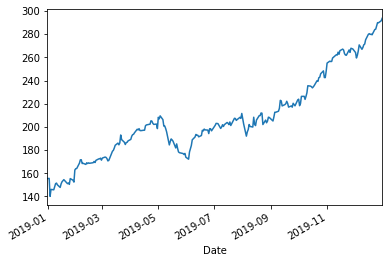

In [32]:
# 위 출력 결과를 보면, 1일 당 6개의 column이 존재함을 알 수 있다
# 이중 'Adj Close' column 에 대해 그래프를 그려보겠다

# 먼저 matplotlib 이라는 visualization 라이브러리를 import 하겠다
import matplotlib.pyplot as plt
%matplotlib inline

data['Adj Close'].plot()
plt.show()

In [44]:
# 이제 데이터를 수치적으로 분석을 해보자
# 먼저 수치적 데이터를 다루는 numpy 라이브러리를 import 해준다
import numpy as np

# 'Adj Close' column에 대해 분석을 해보자
temp_data = data['Adj Close'].values

# Minimum value and its index
min_val = np.min(temp_data)
min_index = np.argmin(temp_data, axis=0)
print('min: {}\nmin_index: {}\n'.format(min_val, min_index))

# Maximum value and its index
max_val = np.max(temp_data)
max_index = np.argmax(temp_data, axis=0)
print('max: {}\nmax_index: {}\n'.format(max_val, max_index))

# Mean
mean = np.mean(temp_data)
print('mean: {}\n'.format(mean))

#Variance
variance = np.var(temp_data)
print('variance: {}'.format(variance))

min: 140.08522033691406
min_index: 2

max: 293.6499938964844
max_index: 252

mean: 206.8125288891698

variance: 1239.113549884711
